In [20]:
import os
import shutil
import numpy as np
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
with open("classifier.json", "r") as f:
    m_js = f.read()
classifier = model_from_json(m_js)
classifier.load_weights("classifier.h5")

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
classifier.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [22]:
def get_files_list(dir_path):
    return [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

In [23]:
img_width = 32
img_height = 32

clock_dir = "data/clock/"
crocodile_dir = "data/crocodile/"

clock_images = get_files_list(clock_dir)
crocodile_images = get_files_list(crocodile_dir)

In [24]:
def plot_image_and_predict(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    plt.imshow(img)

    prediction = classifier.predict(x)[0,0]
    print(prediction)
    classes=['Crocodile', 'Clock']
    print('{} with probability {:.5f}'.format(classes[int(prediction < 0.5)], max(prediction, 1-prediction)*100))

2.6605622e-07
Clock with probability 99.99997


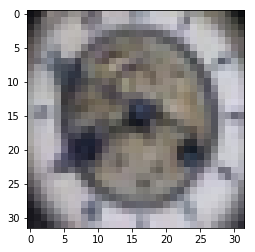

In [25]:
clock_img = np.random.choice(clock_images, 1)[0]
plot_image_and_predict(os.path.join(clock_dir, clock_img))

0.9996507
Crocodile with probability 99.96507


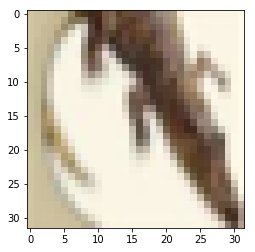

In [26]:
crocodile_img = np.random.choice(crocodile_images, 1)[0]
plot_image_and_predict(os.path.join(crocodile_dir, crocodile_img))

In [28]:
cc = (float(1), "")
for c in crocodile_images:
    image_path = os.path.join(crocodile_dir, c)
    img = image.load_img(image_path, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)


    prediction = classifier.predict(x)[0,0]
    print("{:.7f} {}".format(prediction, image_path))
    if np.abs(prediction - 0.5) < cc[0]:
        cc = (prediction, image_path)

0.9979470 data/crocodile/10366.png
0.9999688 data/crocodile/1041.png
0.7616642 data/crocodile/10410.png
0.9972682 data/crocodile/1055.png
0.9658410 data/crocodile/10551.png
0.9975413 data/crocodile/10626.png
0.9942586 data/crocodile/10719.png
0.9994635 data/crocodile/10814.png
0.9984413 data/crocodile/10862.png
0.9905307 data/crocodile/10865.png
0.9972414 data/crocodile/10875.png
0.9974993 data/crocodile/11025.png
0.9998239 data/crocodile/11165.png
0.9243234 data/crocodile/11177.png
0.9989657 data/crocodile/11184.png
0.9997182 data/crocodile/11226.png
0.9787521 data/crocodile/11353.png
0.8335053 data/crocodile/11423.png
0.9999685 data/crocodile/11536.png
0.9993730 data/crocodile/11621.png
0.9997161 data/crocodile/11639.png
0.9953247 data/crocodile/11828.png
0.9997177 data/crocodile/12015.png
0.9982144 data/crocodile/12072.png
0.9990141 data/crocodile/12197.png
0.9700050 data/crocodile/12212.png
0.9589562 data/crocodile/12278.png
0.9932351 data/crocodile/1239.png
0.9995974 data/crocodil

0.9982438 data/crocodile/32289.png
0.9947142 data/crocodile/3235.png
0.9008687 data/crocodile/3240.png
0.9917051 data/crocodile/32474.png
0.9580794 data/crocodile/32664.png
0.9988166 data/crocodile/32668.png
0.9998376 data/crocodile/32691.png
0.9999971 data/crocodile/32806.png
0.9972827 data/crocodile/32808.png
0.9999949 data/crocodile/33013.png
0.9880738 data/crocodile/33141.png
0.9998860 data/crocodile/33232.png
0.9820068 data/crocodile/33343.png
0.9926875 data/crocodile/33355.png
0.9949483 data/crocodile/33447.png
0.8036659 data/crocodile/33478.png
0.9896074 data/crocodile/33515.png
0.9999908 data/crocodile/3356.png
0.9994664 data/crocodile/33737.png
0.9992228 data/crocodile/33830.png
0.9964544 data/crocodile/34084.png
0.9987963 data/crocodile/34276.png
0.9962748 data/crocodile/34313.png
0.9982665 data/crocodile/34390.png
0.9998205 data/crocodile/34459.png
0.9950336 data/crocodile/34577.png
0.9994758 data/crocodile/34645.png
0.9999862 data/crocodile/34807.png
0.9999815 data/crocodil

0.9674745 data/crocodile/9190.png
0.9708984 data/crocodile/9467.png
0.9937183 data/crocodile/9533.png
0.9995122 data/crocodile/9823.png
0.9999933 data/crocodile/9832.png
0.9998263 data/crocodile/9910.png


(1, 1)
0.117227204
0.382772795855999


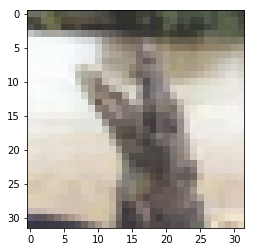

In [34]:
img = image.load_img("data/crocodile/7215.png", target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)

plt.imshow(img)

print(classifier.predict(x).shape)
prediction = classifier.predict(x)[0,0]
print(prediction)
print(np.abs(prediction - 0.5))

In [18]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense, Flatten, Activation, Input
from tensorflow.python.keras.layers import Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, UpSampling2D, UpSampling1D
from tensorflow.python.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [39]:
input_img = Input(shape=(img_width, img_height, 3))

model = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
model = Conv2D(32, (3, 3), padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=(2, 2))(model)

model = Conv2D(64, (3, 3), padding='same', activation='relu')(model)
model = Conv2D(64, (3, 3), padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=(2, 2))(model)

encoded = Conv2D(3, (3, 3), activation='relu', padding='same')(model)
encoder = Model(input_img, encoded, name="classifier")




model = Flatten()(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(1, activation='sigmoid')(model)

classifier = Model(input_img, model, name="classifier")





input_shape= Input((8, 8, 3))

model = Conv2D(32, (3, 3), padding='same', activation='relu')(input_shape)
model = Conv2D(32, (3, 3), padding='same', activation='relu')(model)
model = UpSampling2D((2, 2))(model)

model = Conv2D(64, (3, 3), padding='same', activation='relu')(model)
model = Conv2D(64, (3, 3), padding='same', activation='relu')(model)
model = UpSampling2D((2, 2))(model)

model = Conv2D(3, (3, 3), activation='relu', padding='same')(model)

decoder = Model(input_shape, model, name="decoder")
autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")

In [40]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
classifier.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
clock_path = "data/clock/"
crocodile_path = "data/crocodile/" 

validation_size = 0.1
test_size = 0.15

batch_size = 16

img_width = 32
img_height = 32

In [19]:
def load_images(image_path):
    images = []
    image_list = get_files_list(image_path)
    for i in image_list:
        img = image.load_img(os.path.join(image_path, i), target_size=(img_height, img_width))
        x = image.img_to_array(img)
        x /= 255
        images.append(x)
    return images

clock_images_list = load_images(clock_path)
crocodile_images_list = load_images(crocodile_path)

X = np.array(clock_images_list + crocodile_images_list)
y = np.array([0]*len(clock_images_list) + [1]*len(crocodile_images_list))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size)

In [43]:
classifier.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

Train on 765 samples, validate on 85 samples
Epoch 1/60
765/765 [==============================] - 1s - loss: 0.6707 - acc: 0.5516 - val_loss: 0.6657 - val_acc: 0.6118
Epoch 2/60
765/765 [==============================] - 1s - loss: 0.5894 - acc: 0.6928 - val_loss: 0.5479 - val_acc: 0.7529
Epoch 3/60
765/765 [==============================] - 1s - loss: 0.5076 - acc: 0.7595 - val_loss: 0.5195 - val_acc: 0.7412
Epoch 4/60
765/765 [==============================] - 1s - loss: 0.4285 - acc: 0.7961 - val_loss: 0.3517 - val_acc: 0.8824
Epoch 5/60
765/765 [==============================] - 1s - loss: 0.4238 - acc: 0.8078 - val_loss: 0.5131 - val_acc: 0.7529
Epoch 6/60
765/765 [==============================] - 1s - loss: 0.3687 - acc: 0.8222 - val_loss: 0.3369 - val_acc: 0.8706
Epoch 7/60
765/765 [==============================] - 1s - loss: 0.2890 - acc: 0.8627 - val_loss: 0.2859 - val_acc: 0.8588
Epoch 8/60
765/765 [==============================] - 1s - loss: 0.2751 - acc: 0.8941 - val_lo

In [77]:
autoencoder.fit(X_train, X_train,
                epochs=60,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_val, X_val))


Train on 765 samples, validate on 85 samples
Epoch 1/60
765/765 [==============================] - 3s - loss: 0.6626 - val_loss: 0.6032
Epoch 2/60
765/765 [==============================] - 1s - loss: 0.6001 - val_loss: 0.5817
Epoch 3/60
765/765 [==============================] - 1s - loss: 0.5848 - val_loss: 0.5737
Epoch 4/60
765/765 [==============================] - 1s - loss: 0.5776 - val_loss: 0.5719
Epoch 5/60
765/765 [==============================] - 1s - loss: 0.5776 - val_loss: 0.5731
Epoch 6/60
765/765 [==============================] - 1s - loss: 0.5751 - val_loss: 0.5750
Epoch 7/60
765/765 [==============================] - 1s - loss: 0.5712 - val_loss: 0.5612
Epoch 8/60
765/765 [==============================] - 1s - loss: 0.5679 - val_loss: 0.5592
Epoch 9/60
765/765 [==============================] - 1s - loss: 0.5650 - val_loss: 0.5599
Epoch 10/60
765/765 [==============================] - 1s - loss: 0.5635 - val_loss: 0.5579
Epoch 11/60
765/765 [=======================

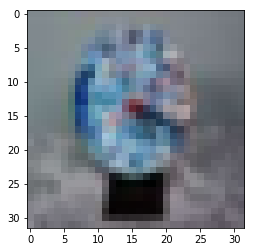

In [78]:
img = image.load_img("train/test/clock/17611.png", target_size=(img_height, img_width))
plt.imshow(img)

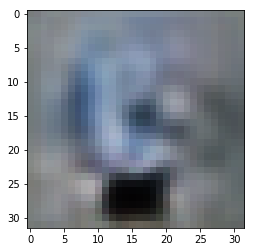

In [79]:
img = image.load_img("train/test/clock/17611.png", target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)

x = autoencoder.predict(x)
plt.imshow(x.reshape(32, 32, 3))

In [74]:
nput_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (4, 4), activation='relu', padding='same')(input_img)
x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)


input_encoded = Input(shape=(8, 8, 3))
x = Conv2D(64, (2, 2), activation='relu', padding='same')(input_encoded)
x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Модели
encoder = Model(input_img, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")

In [76]:
encoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [56]:
autoencoder.fit(X_train, X_train,
                epochs=300,
                batch_size=64,
                shuffle=True,
                validation_data=(X_validation, X_validation))



NameError: name 'X_validation' is not defined

In [32]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [138]:
classifier.predict(x)[0,0]

0.20775141

In [132]:
img = image.load_img("train/test/clock/20184.png", target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
x1 = encoder.predict(x)

img = image.load_img("train/test/crocodile/26692.png", target_size=(img_height, img_width))
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
x2 = encoder.predict(x)

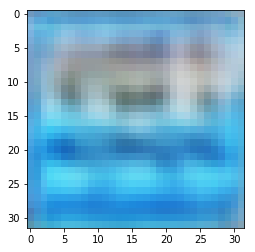

In [133]:
x = decoder.predict(x1)
plt.imshow(x.reshape(32, 32, 3))

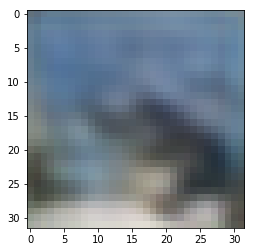

In [134]:
x = decoder.predict(x2)
plt.imshow(x.reshape(32, 32, 3))

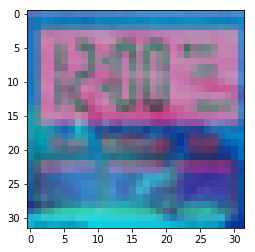

In [135]:
img = image.load_img("train/test/clock/20184.png", target_size=(img_height, img_width))
x_ = image.img_to_array(img)
x_ /= 255.


img = image.load_img("train/test/crocodile/26692.png", target_size=(img_height, img_width))
x__ = image.img_to_array(img)
x__ /= 255.

x = x_
x[::,::,1] = x__[::,::,1]
x[::,::,2] = (x__[::,::,2] + x_[::,::,2]) / 2
plt.imshow(x.reshape(32, 32, 3))
x = np.expand_dims(x, axis=0)

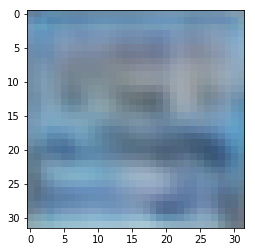

In [137]:
x = decoder.predict((x1 + x2) / 2)
plt.imshow(x.reshape(32, 32, 3))